### Morse Decomposition and Global Dynamics

#### * Graph Theory and Dynamics
#### * 1D and 2D examples
#### * Application to Robotics (Inverted Pendulum)


### Import the modules

CMGDB is the module that computes the Multivalued Map (outer approximation) and the Morse Graph

MultivaluedMap is the module that plot the digraph that represents the Multivalued Map, also it is needed for the module RoA.

RoA is the module that compute regions of attraction and Morse sets.

In [1]:
import sys

import numpy as np  
import matplotlib.pyplot as plt  # module to plot graphs
import graphviz  # module to plot digraphs

import CMGDB
import dytop.CMGDB_util as CMGDB_util
import dytop.MultivaluedMap as MultivaluedMap
import dytop.RoA as RoA

In [2]:
MG_util = CMGDB_util.CMGDB_util()

## Graph Theory and Dynamics

Let's compute the multivalued maps for 1D dynamics and learn how to obtain its Morse Graph (a graph that gives information about the global dynamics).

### 1D dynamics 

Let's review 1D dynamics

First define a function $f:\mathbb{R} \rightarrow \mathbb{R}$

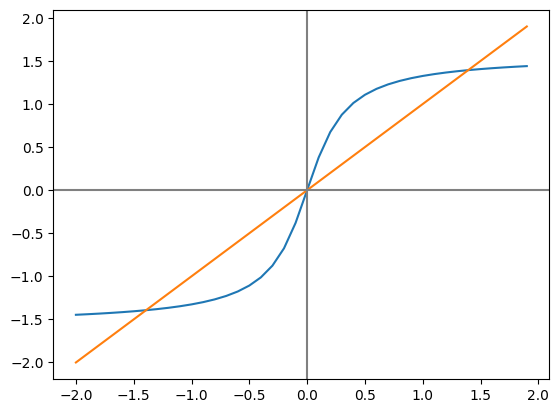

In [3]:
# Define the function that we will analyse 

def f(x):
    return np.arctan(4*x)

# create a plot for function
x = np.arange(-2, 2,0.1)   # start,stop,step
y = f(x)
plt.plot(x,y)

# create a plot for y = x
y = x
plt.plot(x,y)

# create x and y axises
plt.axvline(x=0, c="gray")
plt.axhline(y=0, c="gray")

#show plots
plt.show()

In one dimension, the trajectories of a map can be visualized using the graph of the two functions $y = f(x)$ and $y = x$, as follows:

In [4]:
# auxilary function to plot the trajectories
def iterate(f, initial, n = 10):
    x = [initial]
    y = [0]
    for i in range(n):
        x += [initial]
        y_ = f(initial)
        y += [y_]
        
        x += [y_]
        y += [y_]
        
        initial = y_
        
    return np.array(x), np.array(y) 

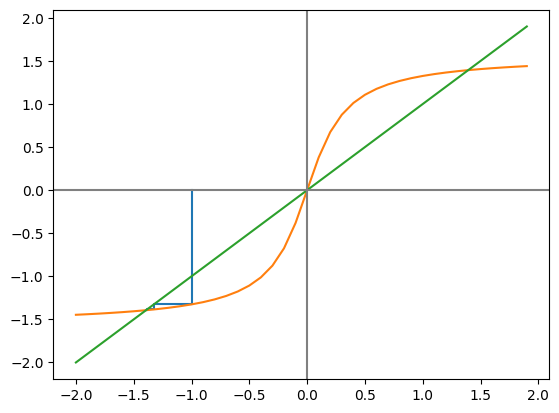

In [5]:
# select initial point to plot trajectory
initial = -1

# iterate the function and create a plot
x, y = iterate(f, initial, n = 10)

plt.plot(x,y)

# create a plot for the function
x = np.arange(-2, 2,0.1)   # start,stop,step
y = f(x)
plt.plot(x,y)

# create a plot for y = x
y = x
plt.plot(x,y)

# create x and y axises
plt.axvline(x=0, c="gray")
plt.axhline(y=0, c="gray")

#show plots
plt.show()

In [6]:
# select how many subdivisions will be performed to discretize the state space into boxes
phase_subdiv = 3

# setup the bounds for the discretization
lower_bounds = [-3.0]
upper_bounds = [3.0]

# the discretization of the state space will produce a grid

In [7]:
# create a multivalued combinatorial map

def f(x):
    return [np.arctan(4*x[0])]

# Define box map for f

def F(rect):
    x_min, x_max = CMGDB.BoxMap(f, rect, padding=False)
    d = (rect[1]-rect[0])/4
    return [x_min -d, x_max +d]

In [8]:
# CMGDB
model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

In [9]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 405 µs, sys: 76 µs, total: 481 µsCompute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 
Wall time: 494 µs
8
Compute_Morse_Graph. B phase_space -> size () == 8
Total Grid Memory (can be external) = 830
Max Memory For Single Grid (must be internal)= 830
Max SCC Random Access memory use (must be internal)= 68
Max SCC stack memory use (can be external memory) = 96
 ---- SUMMARY ---- 
Internal Memory Requirement = 898
External Memory Requirement = 926
Max graph memory size (never stored, however) = 208


Let $X$ be a one dimensional domain.  A finite collection of nonempty closed intervals indexed by $\mathcal{X}$ is called a **grid** for $X$ if it satisfies the following properties: 

* $X = \bigcup_{[a, b] \in \mathcal{X}} [a, b]$;

    
* $[a, b]\cap (c, d) = \emptyset$ for all $[a, b] \neq [c, d]$.

Let's visualize the discretization of the phase space $X = [-3, 3]$ with 3 subdivisions ( a grid with $2^3$ elements in $\mathcal{X}$ ).

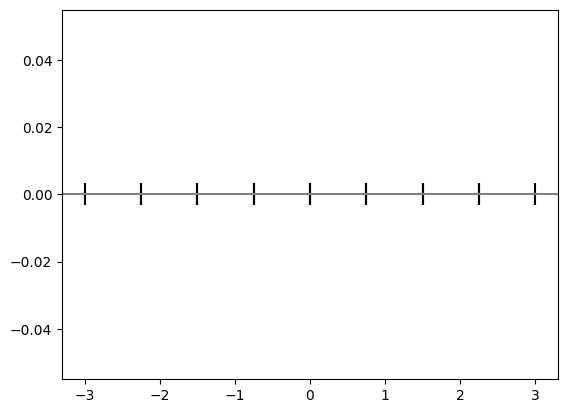

In [10]:
# create x axis
plt.axhline(y=0, c="gray")

# plot the grid
x_ = []
y_ = []
for index_box in range(map_graph.num_vertices()):
    x_+= morse_graph.phase_space_box(index_box)
    y_+= [0,0]
    
plt.scatter(x_,y_, s=30*phase_subdiv*int(upper_bounds[0]), c='k',marker='|')

# show plots
plt.show()

Now, we can load the class RoA to visualize the boxes of Morse sets

In [11]:
# load RoA class
roa = RoA.RoA(map_graph, morse_graph)

dictionary with volume of all Morse tiles = {1: 2.25, 0: 2.25, 2: 1.5}


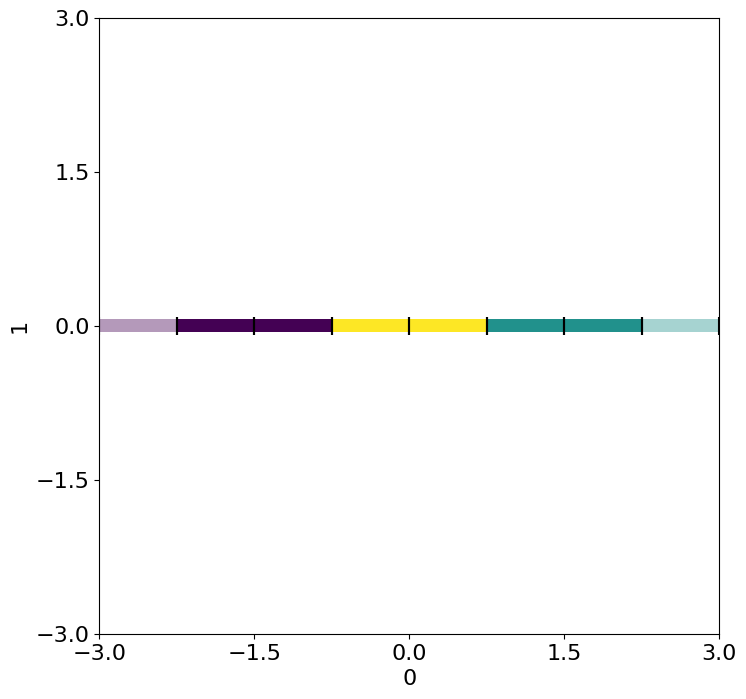

In [12]:
# create a figure with all boxes of the grid
fig, ax = roa.PlotTiles()

# plot the grid
x_ = []
y_ = []
for index_box in range(map_graph.num_vertices()):
    x_+= morse_graph.phase_space_box(index_box)
    y_+= [0,0]

plt.scatter(x_,y_, s=20*phase_subdiv*int(upper_bounds[0]), c='k',marker='|')
plt.show()

Applying the function $f$ to each box (interval) we obtain the image shown in the following figure:

dictionary with volume of all Morse tiles = {1: 2.25, 0: 2.25, 2: 1.5}


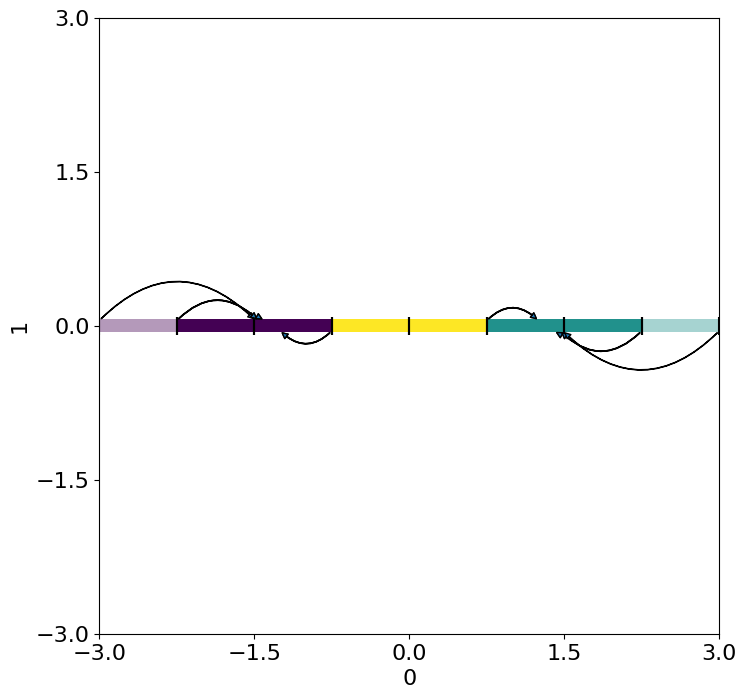

In [13]:
from matplotlib.patches import FancyArrowPatch

# create a figure with all boxes of the grid
fig, ax = roa.PlotTiles()

# plot the grid
x_ = []
y_ = []
for index_box in range(map_graph.num_vertices()):
    x_+= morse_graph.phase_space_box(index_box)
    y_+= [0,0]

plt.scatter(x_,y_, s=20*phase_subdiv*int(upper_bounds[0]), c='k',marker='|')

# save a list with value [x, 0] and [f(x), -2]
im_x = []
im_y = []
for index_box in range(map_graph.num_vertices()):
    im_x+= [f(morse_graph.phase_space_box(index_box)[0:1])[0], f(morse_graph.phase_space_box(index_box)[1:2])[0]]
    im_y+= [-2,-2]

# plot arrows from [x, 0] -> [f(x), -2]
style="Simple,tail_width=0.2,head_width=4,head_length=4"
kw = dict(arrowstyle=style)

for i in range(len(x_)):
    y_inc = 0.05 * np.sign(im_x[i] - x_[i])
    a1 = FancyArrowPatch((x_[i], y_inc), (im_x[i], y_inc),connectionstyle="arc3,rad=-0.5", **kw)
    ax.add_patch(a1)
plt.show()

Now that we can visualize the image of all of the boxes, we can build a combinatorial multivalued map, or directed graph, $\mathcal{F} : X \rightrightarrows X$.  

First load the class MultivaluedMap to plot the combinatorial multivalued map.

In [14]:
# load MultivaluedMap class
MM = MultivaluedMap.MultivaluedMap(map_graph, morse_graph)

Here is the directed graph $\mathcal{F} : X \rightrightarrows X$.

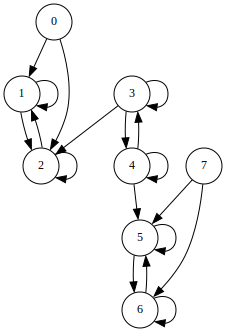

In [15]:
MM.vizualize()  # Vizualize Multivalued Map


*Invariant* sets (such as attractors) are found in collections of boxes that have recurrent behavior.

This recurrent behavior is captured by the strongly connected components of $\mathcal{F}$.

A strongly connected component of $\mathcal{F}$ is a maximal subgraph such that one can get from any one vertex to another.

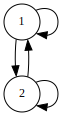

In [16]:
# Strongly connected component
gv = 'digraph {\nnode [fontsize=12, shape=circle]1[label="1"];\n2[label="2"];\n1->1;\n1->2;\n2->2;\n2->1}\n'
graphviz.Source(gv)

Contracting each strongly connected component into a single vertex we obtain a Condensation Graph (CG)

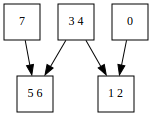

In [17]:
MM.vizualize_CG()  # Condensation Graph

The Morse poset of $\mathcal{F}$ is the subposet of CG consisting of strongly connected components with at least one edge.

The Morse graph $MG(\mathcal{F})$ of $\mathcal{F}$ is the Hasse diagram of the Morse poset.

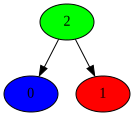

In [18]:
CMGDB.PlotMorseGraph(morse_graph)  # Morse Graph

# Relating the combinatorial multivalued map to dynamics

$A \subset \mathcal{X}$ is an attracting graph if $\mathcal{F}(A) = A$.

An attracting block $U$ of $f$ is a set such that $f(U) \subset int(U)$

When $\mathcal{F}$ is an outer approximation then |A| (collection of intervals in A) is an attracting block 

$f$(|A|) $\subset$ int( |$\mathcal{F}$(A)| ) = int( |A| )

Theorem: A is a lattice of attracting blocks for $f$.

dictionary with volume of all Morse tiles = {1: 2.25, 0: 2.25, 2: 1.5}


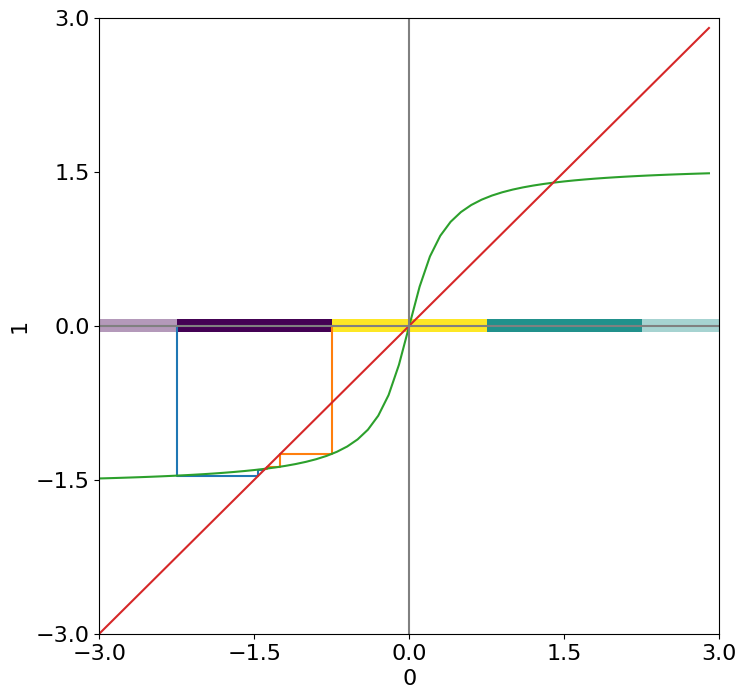

In [19]:
# create a figure with all boxes of the grid
fig, ax = roa.PlotTiles()


def f(x):
    return np.arctan(4*x)

# select initial point to plot trajectory
initial = -2.25

# iterate the function and create a plot
x, y = iterate(f, initial, n = 10)
plt.plot(x,y)

# select initial point to plot trajectory
initial = -0.75

# iterate the function and create a plot
x, y = iterate(f, initial, n = 10)
plt.plot(x,y)

# create a plot for the function
x = np.arange(-3, 3,0.1)   # start,stop,step
y = f(x)
plt.plot(x,y)

# create a plot for y = x
y = x
plt.plot(x,y)

# create x and y axises
plt.axvline(x=0, c="gray")
plt.axhline(y=0, c="gray")

#show plots
plt.show()

## Region of attraction

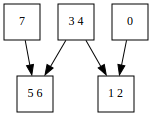

In [22]:
MM.vizualize_CG()  # Condensation Graph

A region of attraction for a given attracting Morse node $M$ (vertex without leaf(child) in the Morse graph) is the collections of boxes such that for each box there is a path to $M$ and no path to any other Morse node.

The Condensation Graph (CG) gives us a quick way to find regions of attraction.  For a given attracting Morse node $M$, get all ancestors of $M$ with a unique descendent $M$.

### Increasing the subdivision of the grid

In [23]:
# select how many subdivisions will be performed to discretize the state space into boxes
phase_subdiv = 4

def f(x):
    return [np.arctan(4*x[0])]

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)

In [24]:
# CMGDB
model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

In [25]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 950 µs, sys: 330 µs, total: 1.28 ms
Wall time: 1.29 ms
Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 16
Compute_Morse_Graph. B phase_space -> size () == 16
Total Grid Memory (can be external) = 2268
Max Memory For Single Grid (must be internal)= 1438
Max SCC Random Access memory use (must be internal)= 136
Max SCC stack memory use (can be external memory) = 104
 ---- SUMMARY ---- 
Internal Memory Requirement = 1574
External Memory Requirement = 2372
Max graph memory size (never stored, however) = 320


In [26]:
# load RoA class
roa = RoA.RoA(map_graph, morse_graph)

dictionary with volume of all Morse tiles = {1: 2.625, 0: 2.625, 2: 0.75}


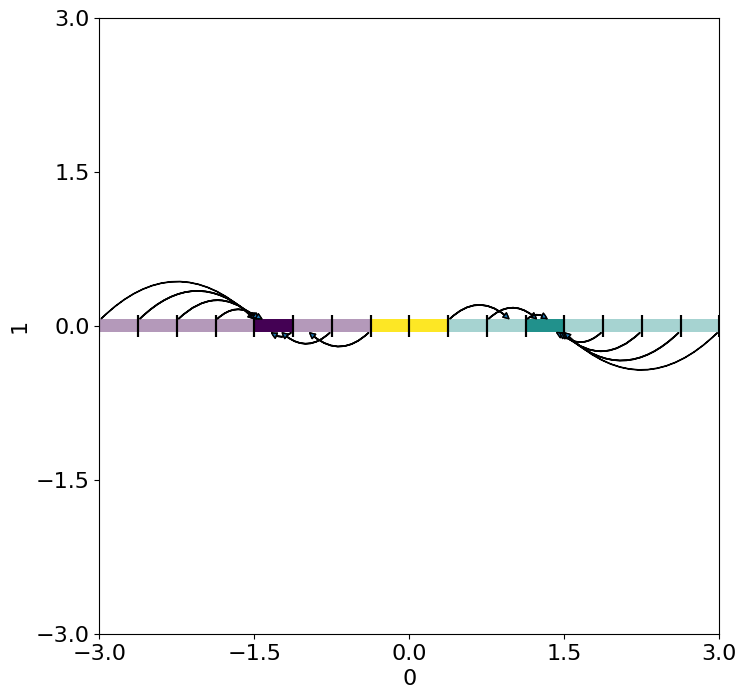

In [27]:
# create a figure with all boxes of the grid
fig, ax = roa.PlotTiles()

# plot the grid
x_ = []
y_ = []
for index_box in range(map_graph.num_vertices()):
    x_+= morse_graph.phase_space_box(index_box)
    y_+= [0,0]

plt.scatter(x_,y_, s=20*phase_subdiv*int(upper_bounds[0]), c='k',marker='|')

# save a list with value [x, 0] and [f(x), -2]
im_x = []
im_y = []
for index_box in range(map_graph.num_vertices()):
    im_x+= [f(morse_graph.phase_space_box(index_box)[0:1])[0], f(morse_graph.phase_space_box(index_box)[1:2])[0]]
    im_y+= [-2,-2]

# plot arrows from [x, 0.5] -> [f(x), 0.5]
for i in range(len(x_)):
    y_inc = 0.05 * np.sign(im_x[i] - x_[i])
    a1 = FancyArrowPatch((x_[i], y_inc), (im_x[i], y_inc),connectionstyle="arc3,rad=-0.5", **kw)
    ax.add_patch(a1)
plt.show()

In [28]:
# load MultivaluedMap class
MM = MultivaluedMap.MultivaluedMap(map_graph, morse_graph)

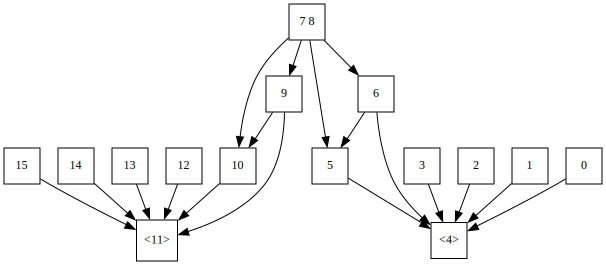

In [29]:
MM.vizualize_CG()  # Condensation Graph

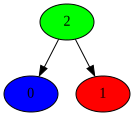

In [30]:
CMGDB.PlotMorseGraph(morse_graph)  # Morse Graph

# Noise in the system
Let's put some noise (perturb) the function by adding sine and cosine

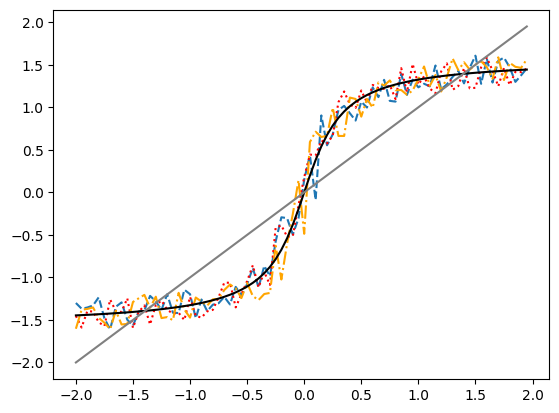

In [31]:
# parameters for the small perturbation to the function
def f(x, eta=0, epsilon=0):
#     return np.arctan(4*x) + c*np.sin(d*x) + a*np.cos(b*x)

    return np.arctan(4*(x + np.random.uniform(-eta, eta, 1))) + np.random.uniform(-epsilon, epsilon, 1)


# parameters
eta, epsilon = (0.1, 0.2)
x = np.arange(-2, 2, 0.05)   # start,stop,step

# plot function
y = [f(x_, eta=eta, epsilon=epsilon) for x_ in x] 
np.array(y)
plt.plot(x,y, "--")

# plot function
y = [f(x_, eta=eta, epsilon=epsilon) for x_ in x] 
np.array(y)
plt.plot(x,y, ":", color = "red")

# plot function
y = [f(x_, eta=eta, epsilon=epsilon) for x_ in x] 
np.array(y)
plt.plot(x,y, "-.", color = "orange")

# plot function
y = [f(x_) for x_ in x] 
np.array(y)
plt.plot(x,y, "-", color = "black")

# plot function
y = x
plt.plot(x,y, color = "gray")
plt.show()

/var/folders/w_/0hk24ktj60s9bkr9qhl1t4yh0000gn/T/ipykernel_28721/3864560142.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(x), np.array(y)


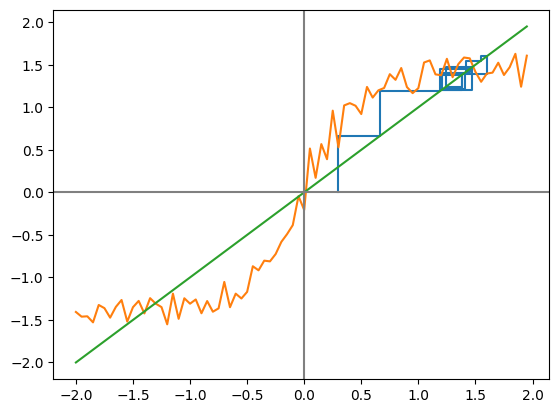

In [32]:
eta, epsilon = (0.1, 0.2)

# select initial point to plot trajectory
initial = 0.3

# iterate the function and create a plot
s = lambda x : f(x, eta=eta, epsilon=epsilon)
x, y = iterate(s, initial, n = 15)

plt.plot(x,y)

# create a plot for the function
x = np.arange(-2, 2,0.05)   # start,stop,step
y = [f(x_, eta=eta, epsilon=epsilon) for x_ in x] 
y = np.array(y)
plt.plot(x,y)

# create a plot for y = x
y = x
plt.plot(x,y)

# create x and y axises
plt.axvline(x=0, c="gray")
plt.axhline(y=0, c="gray")

#show plots
plt.show()

In [33]:
# select how many subdivisions will be performed to discretize the state space into boxes
phase_subdiv = 5

# setup the bounds for the discretization
lower_bounds = [-3.0]
upper_bounds = [3.0]

# the discretization of the state space will produce a grid

In [34]:
def h(x, eta=0, epsilon=0):
    x = np.around(x, 5) 
    if type(x) is np.ndarray:
        seed = hash(tuple(x)) % ((sys.maxsize + 1) * 2)
    else:
        
        seed = hash(x) % ((sys.maxsize + 1) * 2)

    rng = np.random.default_rng(seed)
    rng.random()
    return np.arctan(4*(x + rng.uniform(-eta, eta, 1))) + rng.uniform(-epsilon, epsilon, 1) 

In [35]:
eta, epsilon = (0.05, 0.2)

g = lambda x : [h(x[0], eta=eta, epsilon=epsilon)]

K = [1]
noise = [0.05, 0.1]

def F(rect):
#     return CMGDB.BoxMap(g, rect, padding=True)
    return MG_util.Box_noisy_K(g, rect, K, noise)

In [36]:
# CMGDB
model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

In [37]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 32
CPU times: user 18 ms, sys: 5.16 ms, total: 23.2 ms
Wall time: 21.4 ms
Compute_Morse_Graph. B phase_space -> size () == 32
Total Grid Memory (can be external) = 4922
Max Memory For Single Grid (must be internal)= 2654
Max SCC Random Access memory use (must be internal)= 272
Max SCC stack memory use (can be external memory) = 320
 ---- SUMMARY ---- 
Internal Memory Requirement = 2926
External Memory Requirement = 5242
Max graph memory size (never stored, however) = 1744


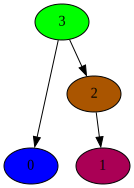

In [38]:
CMGDB.PlotMorseGraph(morse_graph)

In [42]:
# load MultivaluedMap class
MM = MultivaluedMap.MultivaluedMap(map_graph, morse_graph)

roa = RoA.RoA(map_graph, morse_graph)

dictionary with volume of all Morse tiles = {1: 2.625, 0: 2.8125, 2: 0.1875, 3: 0.375}


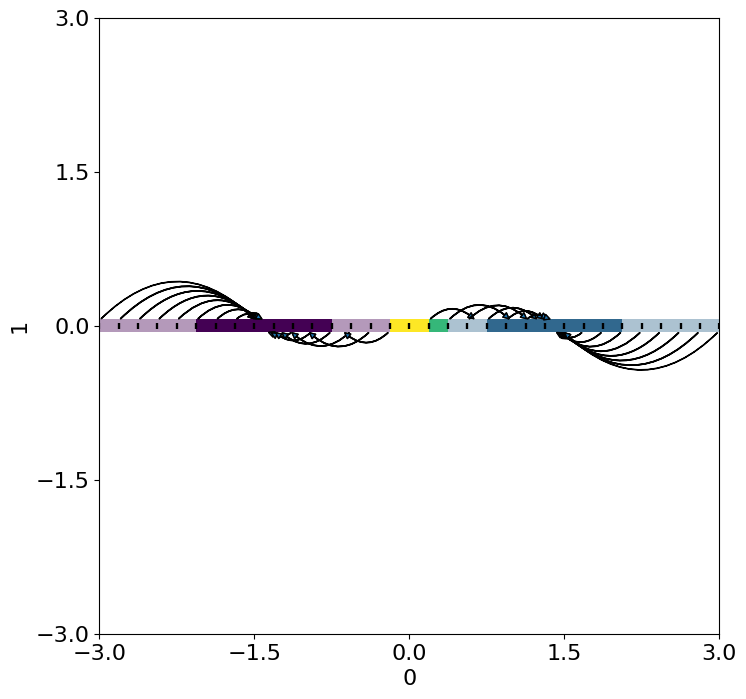

In [43]:
fig, ax = roa.PlotTiles()

x_ = []
y_ = []
for index_box in range(map_graph.num_vertices()):
    x_+= morse_graph.phase_space_box(index_box)
    y_+= [0,0]

plt.scatter(x_,y_, s=phase_subdiv*int(upper_bounds[0]), c='k',marker='|')

im_x = []
im_y = []
for index_box in range(map_graph.num_vertices()):
    im_x+= [f(morse_graph.phase_space_box(index_box)[0:1])[0], f(morse_graph.phase_space_box(index_box)[1:2])[0]]
    im_y+= [-2,-2]

plt.scatter(x_,y_, s=phase_subdiv*int(upper_bounds[0]), c='k',marker='|')
for i in range(len(x_)):
    y_inc = 0.05 * np.sign(im_x[i] - x_[i])
    a1 = FancyArrowPatch((x_[i], y_inc), (im_x[i], y_inc),connectionstyle="arc3,rad=-0.5", **kw)
    ax.add_patch(a1)
plt.show()

dictionary with volume of all Morse tiles = {1: 2.625, 0: 2.8125, 2: 0.1875, 3: 0.375}


/var/folders/w_/0hk24ktj60s9bkr9qhl1t4yh0000gn/T/ipykernel_28721/3864560142.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(x), np.array(y)


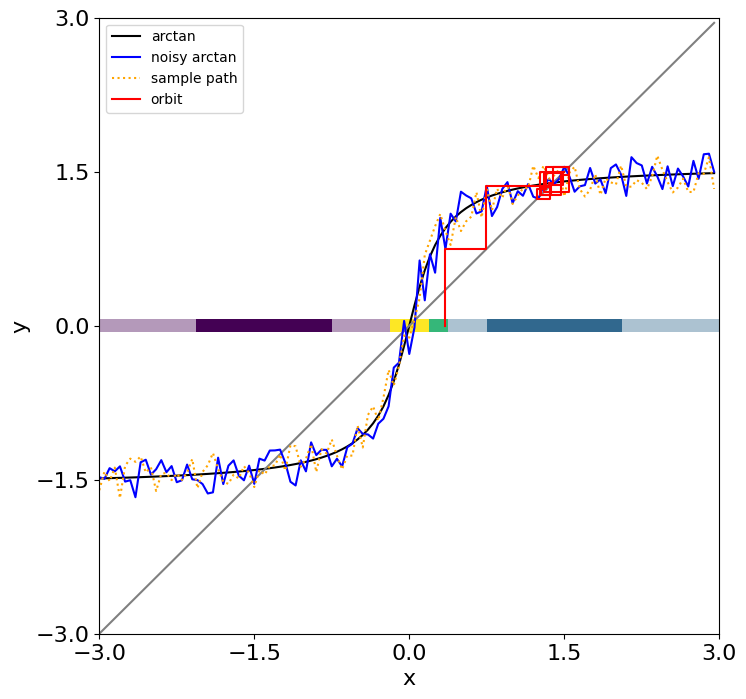

In [44]:
fig, ax = roa.PlotTiles()

# parameters
x = np.arange(-3, 3, 0.05)   # start,stop,step

# plot function
y = [f(x_) for x_ in x] 
np.array(y)
plt.plot(x,y, "-", color = "black", label = 'arctan')



# # plot function
# y = [f(x_, eta=eta, epsilon=epsilon) for x_ in x] 
# np.array(y)
# plt.plot(x,y, ":", color = "red", label = 'arctan + noise')

# # plot function
# y = [f(x_, eta=eta, epsilon=epsilon) for x_ in x] 
# np.array(y)
# plt.plot(x,y, "-.", color = "orange", label = '')



# plot function
y = x
plt.plot(x,y, color = "gray")


# plot function
s = lambda x : h(x, eta=eta, epsilon=epsilon)
y = [s(x_) for x_ in x] 
np.array(y)
plt.plot(x,y, "-", color = "blue",  label = 'noisy arctan')

# plot function
y = [f(x_, eta=eta, epsilon=epsilon) for x_ in x] 
np.array(y)
plt.plot(x,y, ":", color = "orange", label = 'sample path')

# iterate the function and create a plot
initial = 0.35
x, y = iterate(s, initial, n = 15)

plt.plot(x,y, "-", color = "red", label = 'orbit')


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.savefig("noisy_arctan")
plt.show()

In [45]:
# load MultivaluedMap class
MM = MultivaluedMap.MultivaluedMap(map_graph, morse_graph)

# roa = RoA.RoA(map_graph, morse_graph)

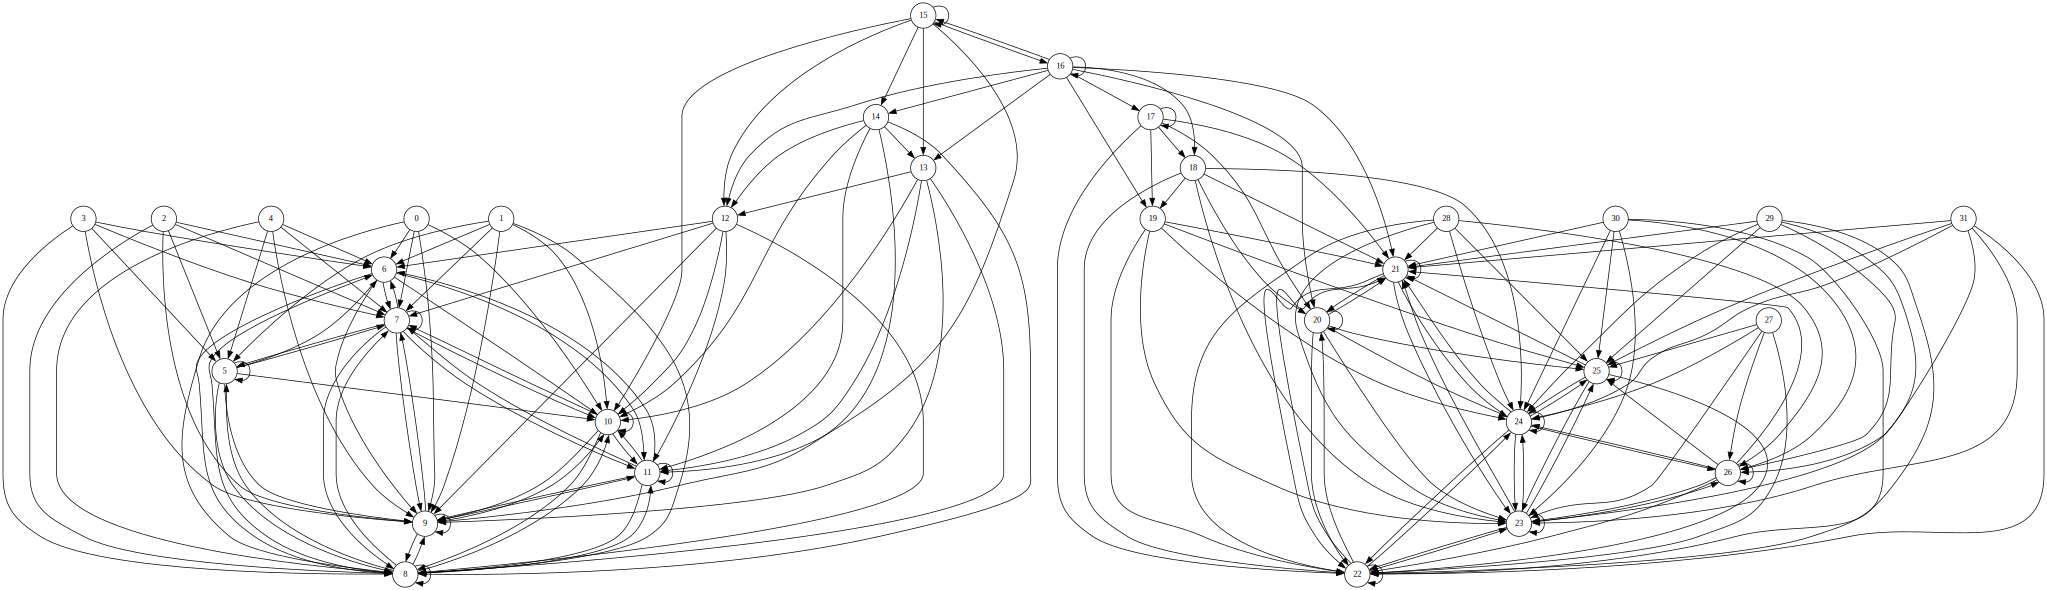

In [47]:
MM.vizualize() # Domain Graph

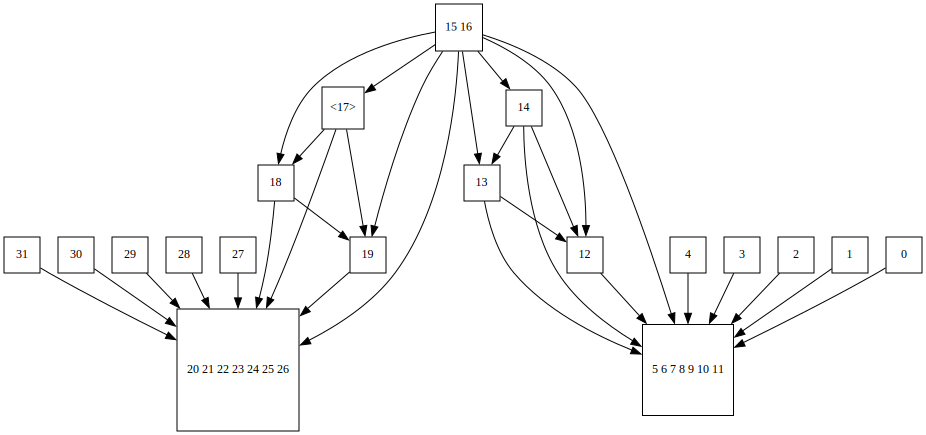

In [48]:
MM.vizualize_CG()  # Condensation Graph

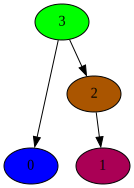

In [49]:
CMGDB.PlotMorseGraph(morse_graph)  # Morse Graph

# 2D examples

## Lattice of Attracting Blocks

$(L, \wedge, \vee, 0, 1)$ denotes a finite bounded distributive lattice.

$L = \mathcal{P}(X)$

$U\wedge V = U \cap V $

$U \vee V = U \cup V$

$0 = \emptyset$

$1 = X$

A lattice is a partially ordered set (poset):

$U < V \quad \Leftrightarrow \quad U \cap V = U$

The poset of join irreducible elements of $L$ is

$J^\vee(L) :=$ { $x \in L$ | if $x = a \vee b$, then $x = a$ or $x = b$}

Let $(P, <)$ denote a partially ordered set (poset).

The lattice of down sets of $(P, <)$ is

$O(P):=${ $U \subset P$ | if $x \in U$ and $y< x$ then $y \in U$}.

#### Attracting blocks

$A \subset \mathcal{X}$ is an attracting graph if $\mathcal{F}(A) = A$.

Given a combinatorial multivalued map
$\mathcal{F}(A): \mathcal{X} \rightrightarrows \mathcal{X}$ , the set of attracting graphs Att($\mathcal{F}(A)$) has a lattice structure.

Let (P,<) be the Morse poset of $\mathcal{F}$ and let O(P) be the lattice of down sets in $(\mathcal{X}, <)$.

Let Att($\mathcal{F}$) be the associated lattice of down sets in $(\mathcal{X}, <)$.

Define A $:=$ { $|A| \ | \ A \in $  Att( $\mathcal{F}$ ) }

An attracting block $U$ of $f$ is a set such that $f(U) \subset int(U)$

$f(|A|) \subset$ int( |$\mathcal{F}$(A)| ) = int( |A| )

Theorem: A is a lattice of attracting blocks for $f$.

$(P, <) \simeq (J^\vee(A), <) $

### Nd bistability

In [50]:
# select how many subdivisions will be performed to discretize the state space into boxes
phase_subdiv = 3

# setup the bounds for the discretization
lower_bounds = [-3.0]
upper_bounds = [3.0]

# the discretization of the state space will produce a grid

In [51]:
# create a multivalued combinatorial map

def f(x):
    return [np.arctan(4*x[0])]

# Define box map for f

def F(rect):
    x_min, x_max = CMGDB.BoxMap(f, rect, padding=False)
    d = (rect[1]-rect[0])/4
    return [x_min -d, x_max +d]

In [52]:
# CMGDB
model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

In [53]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 466 µs, sys: 114 µs, total: 580 µsCompute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 8

Wall time: 562 µs
Compute_Morse_Graph. B phase_space -> size () == 8
Total Grid Memory (can be external) = 5752
Max Memory For Single Grid (must be internal)= 2654
Max SCC Random Access memory use (must be internal)= 272
Max SCC stack memory use (can be external memory) = 320
 ---- SUMMARY ---- 
Internal Memory Requirement = 2926
External Memory Requirement = 6072
Max graph memory size (never stored, however) = 1744


In [54]:
# load RoA class
roa = RoA.RoA(map_graph, morse_graph)

dictionary with volume of all Morse tiles = {1: 2.25, 0: 2.25, 2: 1.5}


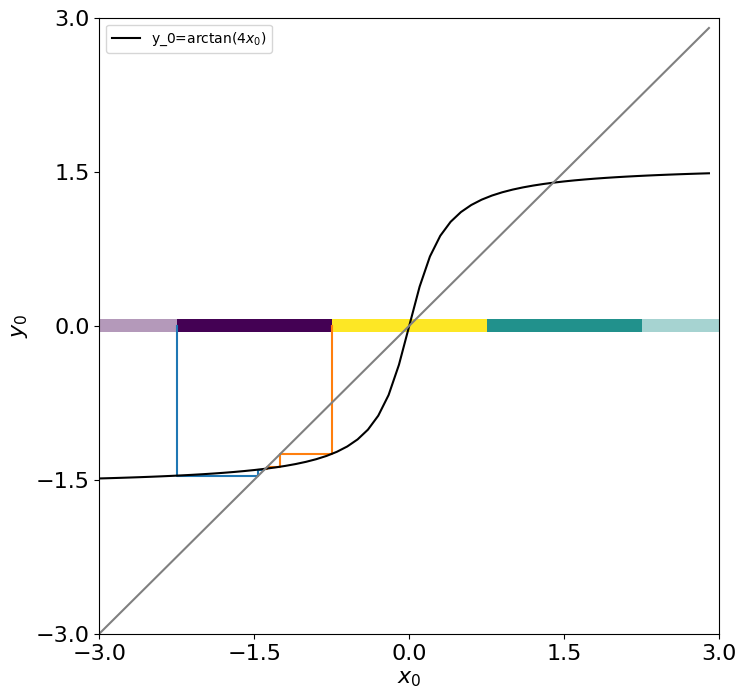

In [56]:
# create a figure with all boxes of the grid
fig, ax = roa.PlotTiles()


def f(x):
    return np.arctan(4*x)

# select initial point to plot trajectory
initial = -2.25

# iterate the function and create a plot
x, y = iterate(f, initial, n = 10)
plt.plot(x,y)

# select initial point to plot trajectory
initial = -0.75

# iterate the function and create a plot
x, y = iterate(f, initial, n = 10)
plt.plot(x,y)

# create a plot for the function
x = np.arange(-3, 3,0.1)   # start,stop,step
y = f(x)
plt.plot(x,y, c="black", label=r'y_0=arctan$(4x_0)$')

# create a plot for y = x
y = x
plt.plot(x,y, c="gray")

# # create x and y axises
# plt.axvline(x=0, c="gray")
# plt.axhline(y=0, c="gray")

#show plots
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$y_0$')
ax.legend()
plt.savefig("y_arctan_high2")
plt.show()

In [57]:
# select how many subdivisions will be performed to discretize the state space into boxes
phase_subdiv = 2

# setup the bounds for the discretization
lower_bounds = [-2.0]
upper_bounds = [2.0]

# the discretization of the state space will produce a grid

In [58]:
# create a multivalued combinatorial map

def f(x):
    return [x[0]/2]

# Define box map for f

def F(rect):
    x_min, x_max = CMGDB.BoxMap(f, rect, padding=False)
    d = (rect[1]-rect[0])/4
    return [x_min -d, x_max +d]

In [59]:
# CMGDB
model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)

In [60]:
%%time
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 243 µs, sys: 40 µs, total: 283 µsCompute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 4
Compute_Morse_Graph. B phase_space -> size () == 4
Total Grid Memory (can be external) = 6278
Max Memory For Single Grid (must be internal)= 2654
Max SCC Random Access memory use (must be internal)= 272
Max SCC stack memory use (can be external memory) = 320
 ---- SUMMARY ---- 
Internal Memory Requirement = 2926
External Memory Requirement = 6598
Max graph memory size (never stored, however) = 1744

Wall time: 287 µs


In [61]:
# load RoA class
roa = RoA.RoA(map_graph, morse_graph)

In [62]:
import matplotlib
# create a figure with all boxes of the grid

greys = matplotlib.cm.get_cmap('Greys', 12)
# print('greys(np.linspace(0, 1, 12))', greys(np.linspace(0, 1, 12)))


newcolors = greys(np.linspace(0, 1, 3))
# print(newcolors)
newcolors[0] = np.array([0.80101604, 0.80101604, 0.80101604, 1.        ])
newcolors[1] = np.array([0.91017825, 0.91017825, 0.91017825, 1.        ])
newcolors[2] = newcolors[1]
# pink = np.array([248/256, 24/256, 148/256, 1])
# newcolors[:25, :] = pink0.83101604 
newcmp = matplotlib.colors.ListedColormap(newcolors)

dictionary with volume of all Morse tiles = {0: 2.0, 1: 1.0, 2: 1.0}


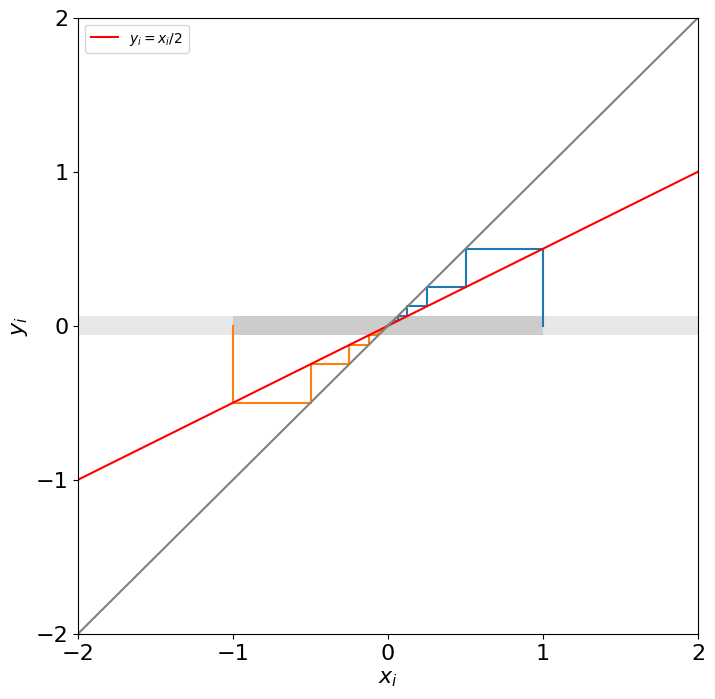

In [63]:
# create a figure with all boxes of the grid

fig, ax = roa.PlotTiles(cmap=newcmp)


def f(x):
    return x/2

# select initial point to plot trajectory
initial = 1

# iterate the function and create a plot
x, y = iterate(f, initial, n = 10)
plt.plot(x,y)

# select initial point to plot trajectory
initial = -1

# iterate the function and create a plot
x, y = iterate(f, initial, n = 10)
plt.plot(x,y)

# create a plot for the function
x = np.arange(-3, 3,0.1)   # start,stop,step
y = f(x)
plt.plot(x,y, c="red", label = r'$y_i=x_i/2$')

# create a plot for y = x
y = x
plt.plot(x,y, c="gray")


#show plots
ax.set_xlabel(r'$x_i$')
ax.set_ylabel(r'$y_i$')
ax.legend()
plt.savefig("y_x_high", dpi=300)
plt.show()